In [1]:
import pandas as pd
import numpy as np
from classevy.klas import StudentGroup, Klas, Plan, PlanPopulation

# Load student data
`students_example.csv` is your input file: which students do we want to divide into classes, what are their properties.
A `StudentGroup` is just a list of students, represented as a `DataFrame`, with some additional attributes defined.
We print the first 8 students.

In [2]:
students = StudentGroup('../data/students_example.csv')
print("Number of students:", len(students))
students[:8]

Number of students: 27


,name,score_math,score_spelling,gender,learning_advantage,not_together,together,preferences
number,,,,,,,,
1,luuk,10,8,1,1,"(4,)","(2,)","(3, 6, 17)"
2,pat,9,7,1,0,(),"(1,)","(5, 9, 27)"
3,jos,8,6,1,0,"(6,)",(),"(2, 1, 21)"
4,pol,7,9,1,0,"(1,)",(),"(5, 6, 7)"
5,katrien,6,7,-1,0,(),(),"(6, 7, 23)"
6,mo,5,5,1,0,"(3, 8)",(),"(12, 5, 25)"
7,tia,6,7,-1,0,(),"(8,)","(8, 17, 23)"
8,karl,7,4,1,0,"(6,)","(7,)","(9, 27, 14)"


We use the `number` column as index, assuming each student in the wholw group has a unique number. The program will yield an error if that is not the case. The `score_math`, `score_spelling` and `learning_advantage` are columns representing the students' study performance. As you can see, they just have to be numeric, but can be any scale. The `gender` column can also be any scale. The program supports non-binary by design! In this example, boys are represented by 1 and girls by -1 but you can use any numerical scale you like. More numeric columns like this can be added at will, in the input CSV file.
The `not_together`, `together` and `preferences` columns are required, but can be left empty. Note that if student 1 has '4' in their `not_together` column, then student 4 needs to have student 1 in their column. If not, the program will throw an error, telling you to fix the file. Similarly, the `together` column needs to be reciprocal. The `preferences` column does not have to be reciprocal, but needs to contain either 3 numbers or no numbers in each field. The program will force the assignment such that at least 1 preference is satisfied.

# Create a 'Population' of 'Plans'
A `Population` from the `optime` package is a set of individuals for a genetic algorithm. It's the starting point from where to optimize. A `Plan` in `classevy` is a certain way of dividing the students into classes. It basically says: try to put student 1 into class 0, student 2 into class 1, students 3 into class 1, etc. But the algorithm will automatically apply the constraints imposed by the `not_together`, `together` and `preferences` data. 
A `PlanPopulation` is a subclass of `Population`, where the individuals are `Plan` objects and the 'dna' of the `Plan` is the intended assignment of students (note that the effective assignment may be different due to those constraints.

We create a `PlanPopulation` based on the `StudentGroup` we created, with 10 plans, and we want to divide the students into 2 classes.
The `Population` has a DataFrame attribute called `df`, which lists all the individuals in the population as well as their performances. Note that these performances have been automatically determined based on the input data. By changing the columns in your CSV file, you can define which data you want to use to divide the students. Alternatively, you can change the `goals_dict` of the `PlanPopulation`.

In [3]:
pop = PlanPopulation(students, 10, 2)
pop.df

,Individual,spread_score_math,spread_score_spelling,spread_gender,spread_learning_advantage,spread_size,assignment_check
0,<classevy.klas.PlanPopulation.__init__.<locals...,0.444079,0.236842,0.414474,0.026316,5.5,True
1,<classevy.klas.PlanPopulation.__init__.<locals...,0.075,0.225,0.0,0.041667,1.5,True
2,<classevy.klas.PlanPopulation.__init__.<locals...,0.0,0.123626,0.049451,0.035714,0.5,True
3,<classevy.klas.PlanPopulation.__init__.<locals...,0.222527,0.197802,0.049451,0.038462,0.5,True
4,<classevy.klas.PlanPopulation.__init__.<locals...,0.0,0.024725,0.197802,0.038462,0.5,True
5,<classevy.klas.PlanPopulation.__init__.<locals...,0.148352,0.173077,0.197802,0.035714,0.5,True
6,<classevy.klas.PlanPopulation.__init__.<locals...,0.075,0.15,0.15,0.041667,1.5,True
7,<classevy.klas.PlanPopulation.__init__.<locals...,0.460227,0.255682,0.255682,0.03125,2.5,True
8,<classevy.klas.PlanPopulation.__init__.<locals...,0.383523,0.204545,0.204545,0.03125,2.5,True
9,<classevy.klas.PlanPopulation.__init__.<locals...,0.416667,0.5,0.166667,0.055556,4.5,True


We can look at a random individual in the population, which is a `Plan`. A `Plan` has a `students` attribute, which is going to contain the same students as the original StudentGroup, but with additional columns: `options`, which represents the possible options for the student's classes, given the constraints, `dna_assignment`, which is the original intended assignment and `final_assignment`, the assignment given based on `dna_assigment` and the `together`, `not_togetger` and `preferences` constraints. Finally the `pref_satisfied` column shows how many of the preferences for each student are satisfied. A Plan is only valid if this column is >0 for each student.

In [4]:
pop.df.at[4, "Individual"].students

,name,score_math,score_spelling,gender,learning_advantage,not_together,together,preferences,options,dna_assignment,final_assignment,pref_satisfied
number,,,,,,,,,,,,
1,luuk,10,8,1,1,"(4,)","(2,)","(3, 6, 17)",[0],0,0.0,1.0
2,pat,9,7,1,0,(),"(1,)","(5, 9, 27)",[0],1,0.0,1.0
3,jos,8,6,1,0,"(6,)",(),"(2, 1, 21)",[0],0,0.0,2.0
4,pol,7,9,1,0,"(1,)",(),"(5, 6, 7)",[1],0,1.0,2.0
5,katrien,6,7,-1,0,(),(),"(6, 7, 23)","[0, 1]",1,1.0,1.0
6,mo,5,5,1,0,"(3, 8)",(),"(12, 5, 25)",[1],0,1.0,2.0
7,tia,6,7,-1,0,(),"(8,)","(8, 17, 23)",[0],0,0.0,2.0
8,karl,7,4,1,0,"(6,)","(7,)","(9, 27, 14)",[0],1,0.0,1.0
9,siem,8,3,1,0,(),(),"(10, 18, 19)","[0, 1]",1,1.0,1.0


Let's look at the `goals_dict` attribute of the population. The goals that are automaticaly created are called something like `spread_` + the name of most of the columns. We leave out the `name`, `number`, `not_together`,` together` and `preferences` columns because those are not meant to be optimized. By default, we will try to minimize the spread of these properties between classes. For a certain `Plan`, we calculate the mean of each property per class and then calculate the standard deviation between those means across classes. By minimizing this standard deviation, or spread, we will make the classes as much as possible the same on average. Note that we don't currently minimize the spread of spreads (i.e. try to make the differences within classes similar between classes). But feel free to define that target yourself :)

In [5]:
pop.goals_dict

{'spread_score_math': {'direction': 'min', 'target': 0.0},
 'spread_score_spelling': {'direction': 'min', 'target': 0.0},
 'spread_gender': {'direction': 'min', 'target': 0.0},
 'spread_learning_advantage': {'direction': 'min', 'target': 0.02},
 'spread_size': {'direction': 'min', 'target': 0.5}}

With a given list of students, there's only so much you can do. I.e. if there's an odd number of students and an even number of classes, then you can't have classes of the same size, or with the same average gender. So on each plan, based on the student list, we can define the best outcome possible on each goal. In the `goals_dict` attribute, these targets are listed under the `'target'` key.

Take for example the sizes of the classes: the best you can achieve with 27 students is 1 class of 14 and 1 class of 13 students.
    
Since standard deviation is defined as:

$\sigma = \sqrt{\frac{\sum{(x_i-\mu)^2}}{N}}$,

For size: $\mu=13.5$ and $x_0=14$ and $x_1=13$ so the difference with the mean is $0.5$ in both cases, which we divide by 2 and then sum.

This results in a `spread_size` of 0.5. It's futile to try to get better results than that.
Note that if the number of boys and girls are both odd, there's an inherent tension between class size and average gender. Take the example of 5 and 5: average gender being equal in both classes would lead to 2 boys + 2 girls and 3+3. However, we could also look at targeting abs(average(gender)) being equal. But it's quickly clear why that wouldn't work. Because then having 5 boys in 1 and 5 girls in the other class would be a perfect solution. By minimizing the spread on gender, we target at the same time average gender in each class toward zero. Because shifting the balance inherently increases the spread.

# Running the Genetic Algorithm
We can tune some of the knobs of the [genetic algorithm](https://en.wikipedia.org/wiki/Genetic_algorithm), like:
- n_gen: The maximum number generation to run the GA for.
- mateprob: Probability for mating. 1 corresponds to 2 parent vectors of
    length equal to population size.
- mutprob: Probability of mutating, should be <=1.
- mutvalues: If necessary, can pass possible values for each element in the DNA
- stop_on_steady_n: if the mean and best values for all criteria don't change
    for this many generations, exit.
- verbose: Turn on or off print statements.

After the run, we can plot the progress over generations. The *target* line in blue represents the best value we could achieve for each goal if we didn't care about the other goals. The *mean* line in red x's is the mean value for this goal across the population and the *best* line in red dots is the best value across the population. Hopefully, both red lines converge toward the target...

Doing generation 0.
Doing generation 1.
Doing generation 2.
Doing generation 3.
Stop criteria met, stopping early.
Mean and best values for goals haven't changed for 3 generations


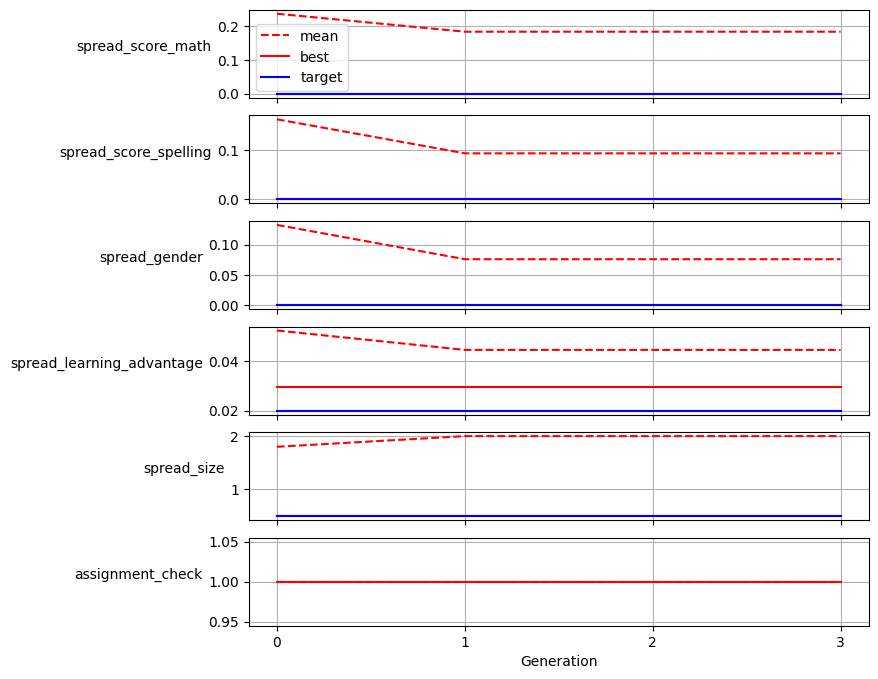

In [6]:
pop.run(n_gen=20, mutprob=0.2, stop_on_steady_n=3, verbose=True)
pop.plot_progress()

# Choosing a solution
After the optimization, the Pareto front will tell us which are the best plans at that moment. By definition, it's impossible to determine the best solution from the Pareto front, since that means you actually have a different way of defining performance. In this case, we could simply take the sum of the spreads and take the plan that has the smallest value. But then we didn't actually need a multi-level optimization, we could have just defined 1 goal: to minimize the sum of spreads. But just for this example, let's automatically choose 1 solution.

In [7]:
front = pop.pareto()
front['sum'] = sum([front[col] for col in pop.goals_names])
front.sort_values('sum').drop(columns=['Individual'])

,spread_score_math,spread_score_spelling,spread_gender,spread_learning_advantage,spread_size,assignment_check,sum
6,0.0,0.173077,0.098901,0.038462,0.5,True,0.81044
1,0.148352,0.271978,0.197802,0.035714,0.5,True,1.153846
8,0.15,0.0,0.15,0.033333,1.5,True,1.833333
3,0.3,0.075,0.0,0.041667,1.5,True,1.916667
0,0.525,0.0,0.0,0.116667,1.5,True,2.141667
2,0.076705,0.025568,0.051136,0.045455,2.5,True,2.698864
4,0.0,0.127841,0.102273,0.045455,2.5,True,2.775568
9,0.230114,0.025568,0.051136,0.03125,2.5,True,2.838068
7,0.0,0.185294,0.052941,0.029412,3.5,True,3.767647
5,0.397059,0.052941,0.052941,0.029412,3.5,True,4.032353


In [8]:
best_plan = front.sort_values('sum').iloc[0].values[0]

Let's show the students for the best plan. The `final_assignment` columns shows in which class each student belongs. But from this table it's very hard to see how evenly the properties are spread.

In [9]:
best_plan.students

,name,score_math,score_spelling,gender,learning_advantage,not_together,together,preferences,options,dna_assignment,final_assignment,pref_satisfied
number,,,,,,,,,,,,
1,luuk,10,8,1,1,"(4,)","(2,)","(3, 6, 17)",[1],1.000000,1.0,2.0
2,pat,9,7,1,0,(),"(1,)","(5, 9, 27)",[1],1.000000,1.0,2.0
3,jos,8,6,1,0,"(6,)",(),"(2, 1, 21)",[0],0.000000,0.0,1.0
4,pol,7,9,1,0,"(1,)",(),"(5, 6, 7)",[0],0.000000,0.0,1.0
5,katrien,6,7,-1,0,(),(),"(6, 7, 23)","[0, 1]",1.000000,1.0,1.0
6,mo,5,5,1,0,"(3, 8)",(),"(12, 5, 25)",[1],0.235442,1.0,2.0
7,tia,6,7,-1,0,(),"(8,)","(8, 17, 23)",[0],0.000000,0.0,2.0
8,karl,7,4,1,0,"(6,)","(7,)","(9, 27, 14)",[0],0.000000,0.0,1.0
9,siem,8,3,1,0,(),(),"(10, 18, 19)","[0, 1]",1.000000,1.0,1.0


On the `Plan` class, we've defined some attributes to show the properties per class. The `classes_df_output` contains the students per class in 2 DataFrames in a list. Similarly, the `df_means_classes` attribute has the averages per class. We can concatenate and print these as 1 DataFrame per class:

In [10]:
pd.concat([best_plan.classes_df_output[0], best_plan.df_means_classes[0]])

,name,score_math,score_spelling,gender,learning_advantage,not_together,together,preferences,pref_satisfied
3,jos,8,6,1,0,"(6,)",(),"(2, 1, 21)",1.0
4,pol,7,9,1,0,"(1,)",(),"(5, 6, 7)",1.0
7,tia,6,7,-1,0,(),"(8,)","(8, 17, 23)",2.0
8,karl,7,4,1,0,"(6,)","(7,)","(9, 27, 14)",1.0
15,maria,7,8,-1,0,(),(),"(5, 6, 7)",1.0
18,pieter,10,7,1,1,(),(),"(2, 1, 21)",1.0
19,pier,6,6,1,0,(),(),"(7, 19, 17)",2.0
20,pieter,8,7,1,0,"(12,)",(),"(3, 22, 1)",1.0
21,maarten,6,8,1,0,(),(),"(3, 6, 17)",1.0
23,rinus,8,6,1,0,(),(),"(5, 8, 10)",1.0


In [11]:
pd.concat([best_plan.classes_df_output[1], best_plan.df_means_classes[1]])

,name,score_math,score_spelling,gender,learning_advantage,not_together,together,preferences,pref_satisfied
1,luuk,10,8,1,1,"(4,)","(2,)","(3, 6, 17)",2.0
2,pat,9,7,1,0,(),"(1,)","(5, 9, 27)",2.0
5,katrien,6,7,-1,0,(),(),"(6, 7, 23)",1.0
6,mo,5,5,1,0,"(3, 8)",(),"(12, 5, 25)",2.0
9,siem,8,3,1,0,(),(),"(10, 18, 19)",1.0
10,ahmed,8,8,1,0,(),"(11,)","(12, 5, 25)",2.0
11,pius,5,6,1,0,(),"(10,)","(2, 4, 6)",2.0
12,darius,4,5,1,-1,"(20,)",(),"(10, 18, 19)",1.0
13,marius,6,7,1,0,(),(),"(5, 6, 7)",2.0
14,mario,9,6,1,0,(),(),"(1, 3, 5)",2.0


Of course, everyone likes Excel, so we can write the same info to an excel file:

In [12]:
best_plan.write_excel('Example_Best_Plan.xlsx')

... and that's that! Please try it out with different student files, different number of classes, etc. If you have any comments or feedback, let me know at maarten.tytgat@gmail.com.